### Note for question3
- Please follow the template to complete q3
- You may create new cells to report your results and observations

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## P1. Load data and plot
### TODO
- load q3_data.csv
- plot the points of different labels with different color

(126, 2) (125, 2)


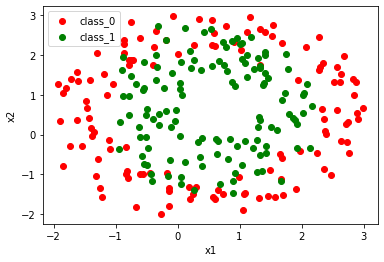

In [36]:
# Load dataset
data = pd.read_csv("q3_data.csv")
data = data.to_numpy()

# Plot points
class_1_idx = np.where(data[:,2] == 1)
class_1 = data[class_1_idx,:2].squeeze()
class_0 = data[np.where(data[:,2] == 0),:2].squeeze()

fig, ax = plt.subplots(1)
ax.scatter(class_0[:,0], class_0[:,1], color='r', label="class_0")
ax.scatter(class_1[:,0], class_1[:,1], color='g', label="class_1")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
print(class_1.shape, class_0.shape)

## P2. Feature mapping
### TODO
- implement function **map_feature()** to transform data from original space to the 28D space specified in the write-up

In [4]:
# Transform points to 28D space
def map_feature(data):
    #taking the first column of input ie x1 and x2
    x1 = data[:,0]
    x1 = np.expand_dims(x1,axis=1)
    x2 = data[:,1]
    x2 = np.expand_dims(x2,axis=1)

    curr = np.concatenate((x1,x2),axis=1)
    #created an array named final, whose first column is 1
    final = np.full((x1.shape[0],1),1)
    #concatenate 1,x1,x2 array
    final = np.concatenate((final,curr),axis=1)

    for i in range(2,7,1):
        m = int(np.floor(curr.shape[1]/2)+1)
        n = int(np.floor(curr.shape[1]/2))
        x1_part = curr[:,0:m]*x1
        x2_part = curr[:,n:curr.shape[1]]*x2
        #make the new feature matrix columns by multiplying previous generated features
        #with x1 and x2
        curr = np.concatenate((x1_part,x2_part),axis=1)
        #append the currently generated array to the final
        final = np.concatenate((final,curr),axis=1)
    return final

final = map_feature(data)

In [5]:
# Define your functions here
def sigmoid(x):
    #returns the sigmoid of input data
     sig_x = 1/(1 + np.exp(-x))
     return sig_x

def calculate_gradients(Y,X,sig_x,lambd,updated_weights):
    #calculating the gradients
    grad = X*(sig_x-Y) 
    
    #defining regularization functions
    regularization = updated_weights.copy()
    #implementing regularization only for weights except bias
    regularization[0] = 0
    regularization[1:] *= lambd
    
    loss = -Y * np.log10(sig_x) -(1-Y)*np.log10(1-sig_x)
    loss = np.sum(loss,axis=0)
    loss_regularization = np.sum(np.power(updated_weights,2),axis=0)/(2*Y.shape[0])
    loss += loss_regularization
    
    global loss_list
    loss_list.append(loss)
    
    current_grads = np.sum(grad,axis=0)
    current_grads = np.expand_dims(current_grads,axis=1)
    #calculating gradients using L2 regularization
    current_grads = (current_grads+regularization)/Y.shape[0]
    return current_grads

def update_weights(prev_weights, current_grads, learning_rate):
    #updating the weights
    prev_weights -= learning_rate*current_grads
    return prev_weights

def main(X, Y, weights,alpha,learning_rate, num_steps):
    updated_weights = weights

    for j in range(num_steps):
        sig_x = sigmoid(X@updated_weights)
        predicted = np.where(sig_x<0.5,0,1)
        accuracy = np.sum(predicted == Y)/Y.shape[0]
        #print(accuracy)
        #print(sig_x.shape,X.shape,Y.shape)
        current_grads = calculate_gradients(Y,X,sig_x,alpha,updated_weights)
        #current_grads = np.expand_dims(current_grads,axis=1)
        updated_weights = update_weights(updated_weights,current_grads,learning_rate)
    
    return updated_weights
        
def predict(final_weights,X):
    sig_x = sigmoid(X@final_weights)
    return sig_x


In [6]:
def logistic_regression_regularized(alpha,initial_weights,lr,number_of_iterations):
    X = final
    Y = data[:,2]
    Y = np.expand_dims(Y,axis=1) 
    final_weights = main(X,Y,weights=initial_weights,alpha=alpha,learning_rate=lr,num_steps=number_of_iterations)
    #print(final_weights.shape,X.shape)
    predicted = predict(final_weights,X)
    predicted = np.where(predicted<0.5,0,1)
    accuracy = np.sum(predicted == Y)/Y.shape[0]
    print("Accuracy for lambda=",alpha," : ",accuracy)#,"Coefficients: ",final_weights)
    return final_weights

In [37]:
# Plot decision boundary
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
x,y,xv, yv
h = .01
x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()
x1, y1 = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

xx = x1.reshape(-1,1)
yy = y1.reshape(-1,1)
mesh_data = np.concatenate([xx,yy],axis = 1)
mesh_data = map_feature(mesh_data)

def plot_countour(final_weights):
    predicted_mesh = predict(final_weights,mesh_data)
    predicted_mesh = np.where(predicted_mesh<0.5,0,1)
    predicted_mesh = predicted_mesh.reshape(x1.shape)

    fig, ax = plt.subplots(1)
    ax.scatter(class_0[:,0], class_0[:,1], color='r', label="class_0")
    ax.scatter(class_1[:,0], class_1[:,1], color='g', label="class_1")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend()
    ax.contour(x1,y1,predicted_mesh,levels=[1])

## P4. Tune the strength of regularization
### TODO
- tweak the hyper-parameter $\lambda$ to be $[0, 1, 100]$
- draw the decision boundaries


Accuracy for lambda= 0  :  0.8685258964143426
final weights:  [ 3.41421127  0.09472157  0.63773323 -0.30190954 -0.9114259  -0.12601866
  0.28713364  1.04951738 -0.32212943 -1.01455583 -1.30320873  0.20956718
 -0.53474073 -0.01875392 -0.3928393   1.26532246  0.57789427  0.35449801
  0.41480507  1.21375678  0.87640593 -0.34797747 -0.3189492  -0.15930069
 -0.19518332 -0.2517759  -0.38654135 -0.25222523]


<ipython-input-37-f12fe0a94fe7>:29: UserWarning: No contour levels were found within the data range.
  ax.contour(x1,y1,predicted_mesh,levels=[1])


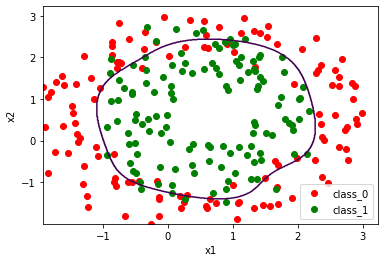

In [38]:
# lambda = 0
loss_list = []
initial_weight = np.zeros((28,1))
lr = .005
number_of_iterations = 65000
final_weights = logistic_regression_regularized(0,initial_weight,lr,number_of_iterations)
print("final weights: ",final_weights[:,0])
plot_countour(final_weights)
iteration_list = np.arange(1,number_of_iterations+1,1)


Accuracy for lambda= 1  :  0.8725099601593626
final weights:  [ 3.19875908  0.2166378   0.47505822 -0.43078569 -0.53243825 -0.28807149
  0.28434898  0.73949422 -0.0463839  -0.50945156 -0.87360264  0.1679833
 -0.3250541   0.02457974 -0.26620888  0.88296733  0.44149728  0.24470545
  0.30527777  0.92957401  0.64501353 -0.25933276 -0.23408823 -0.16372955
 -0.14263605 -0.22224787 -0.30758602 -0.19964328]


<ipython-input-37-f12fe0a94fe7>:29: UserWarning: No contour levels were found within the data range.
  ax.contour(x1,y1,predicted_mesh,levels=[1])


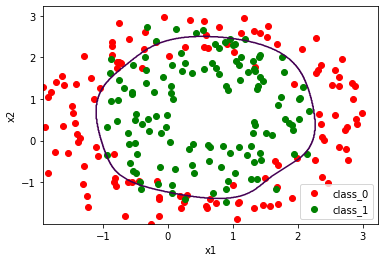

In [39]:
# lambda = 1
loss_list = []
lr = .005
number_of_iterations = 65000
initial_weight = np.zeros((28,1))
final_weights = logistic_regression_regularized(1,initial_weight,lr,number_of_iterations)
plot_countour(final_weights)
print("final weights: ",final_weights[:,0])


Accuracy for lambda= 100  :  0.8207171314741036
final weights:  [ 1.61749735  0.10032936  0.07711003 -0.03337203  0.02790076 -0.00267251
  0.13152594  0.05460935  0.10774059  0.11905399 -0.05316493  0.05228614
 -0.01311043  0.09879912  0.04485398  0.20034653  0.0410622   0.06245469
  0.00831589  0.16565254  0.21172377 -0.1138199   0.01219723 -0.09680202
  0.00397365 -0.16027304 -0.04592887 -0.11870196]


<ipython-input-37-f12fe0a94fe7>:29: UserWarning: No contour levels were found within the data range.
  ax.contour(x1,y1,predicted_mesh,levels=[1])


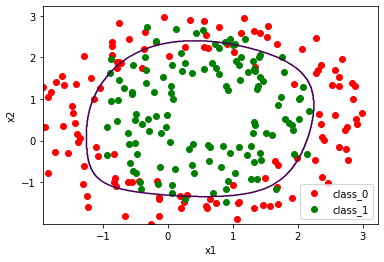

In [40]:
# lambda = 100
loss_list = []
lr = .005
number_of_iterations = 65000
initial_weight = np.zeros((28,1))
final_weights = logistic_regression_regularized(100,initial_weight,lr,number_of_iterations)
plot_countour(final_weights)
print("final weights: ",final_weights[:,0])


# Answer for part (d) here: 
But increasing lambda decreases the over fitting, and also it brings down the value of coefficients of the weights of the model and makes it close to 0. So for lambda = 100, the accuracy very lower compared to lambda=0,1, as well as the weights have a lower magnitutude. It shows the data is underfitted. So as the lambda increases overfitting reduces